In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.shape

(10683, 11)

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(10682, 11)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [14]:
df['Journey_Day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['Jouney_Month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df['Journey_Year']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [18]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " +duration[i]

In [19]:
duration_hours=[]
duration_minute=[]

In [20]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [21]:
df["Duration_hours"]=duration_hours
df["Duration_minute"]=duration_minute

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [23]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


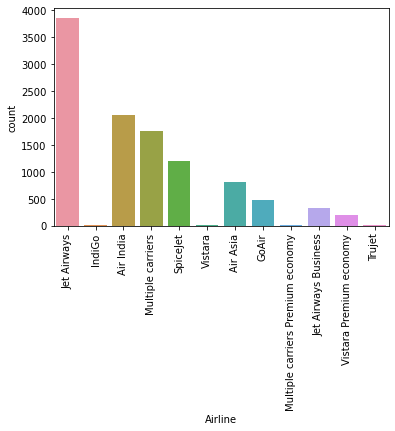

In [34]:
g=sns.countplot('Airline',data=df)
g.set_xticklabels(labels=["Jet Airways","IndiGo","Air India","Multiple carriers","SpiceJet","Vistara","Air Asia","GoAir","Multiple carriers Premium economy","Jet Airways Business","Vistara Premium economy","Trujet"],rotation=90)
plt.show()

In [24]:
df['Airline'].replace(to_replace="Jet Airways",value=0,inplace=True)
df['Airline'].replace(to_replace="IndiGo",value=1,inplace=True)
df['Airline'].replace(to_replace="Air India",value=2,inplace=True)
df['Airline'].replace(to_replace="Multiple carriers",value=3,inplace=True)
df['Airline'].replace(to_replace="SpiceJet",value=4,inplace=True)
df['Airline'].replace(to_replace="Vistara",value=5,inplace=True)
df['Airline'].replace(to_replace="Air Asia",value=6,inplace=True)
df['Airline'].replace(to_replace="GoAir",value=7,inplace=True)
df['Airline'].replace(to_replace="Multiple carriers Premium economy",value=3.1,inplace=True)
df['Airline'].replace(to_replace="Jet Airways Business",value=0.1,inplace=True)
df['Airline'].replace(to_replace="Vistara Premium economy",value=5.1,inplace=True)
df['Airline'].replace(to_replace="Trujet",value=8,inplace=True)

In [25]:
df['Airline'].value_counts()

0.0    3849
1.0    2053
2.0    1751
3.0    1196
4.0     818
5.0     479
6.0     319
7.0     194
3.1      13
0.1       6
5.1       3
8.0       1
Name: Airline, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

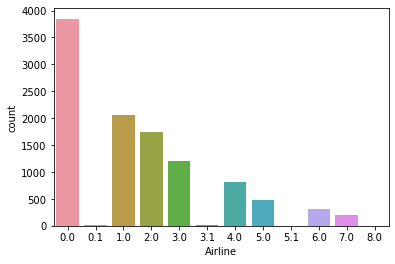

In [35]:
sns.countplot('Airline',data=df)

In [26]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source', ylabel='count'>

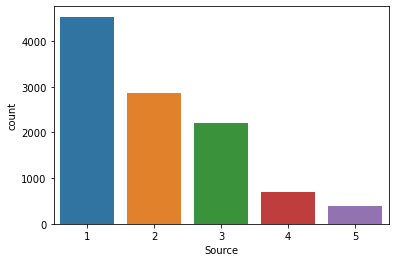

In [36]:
sns.countplot('Source',data=df)

In [27]:
df['Source'].replace(to_replace="Delhi",value=1,inplace=True)
df['Source'].replace(to_replace="Kolkata",value=2,inplace=True)
df['Source'].replace(to_replace="Banglore",value=3,inplace=True)
df['Source'].replace(to_replace="Mumbai",value=4,inplace=True)
df['Source'].replace(to_replace="Chennai",value=5,inplace=True)

In [28]:
df['Source'].value_counts()

1    4536
2    2871
3    2197
4     697
5     381
Name: Source, dtype: int64

In [37]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

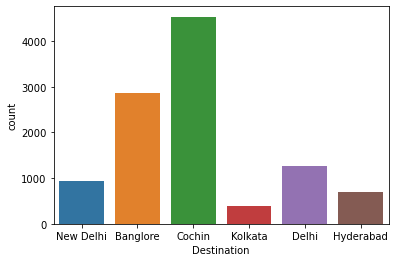

In [38]:
sns.countplot('Destination',data=df)

In [39]:
df['Destination'].replace(to_replace="New Delhi",value=6,inplace=True)
df['Destination'].replace(to_replace="Banglore",value=7,inplace=True)
df['Destination'].replace(to_replace="Cochin",value=0,inplace=True)
df['Destination'].replace(to_replace="Kolkata",value=8,inplace=True)
df['Destination'].replace(to_replace="Delhi",value=9,inplace=True)
df['Destination'].replace(to_replace="Hyderabad",value=10,inplace=True)

In [40]:
df['Destination'].value_counts()

0     4536
7     2871
9     1265
6      932
10     697
8      381
Name: Destination, dtype: int64

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,1.0,24/03/2019,3,6,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,2.0,1/05/2019,2,7,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,0.0,9/06/2019,1,0,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,1.0,12/05/2019,2,7,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,1.0,01/03/2019,3,6,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [42]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

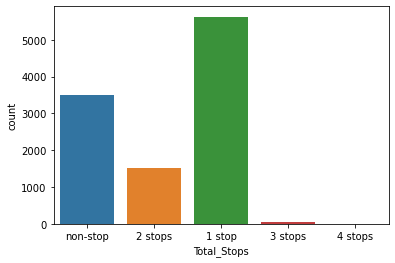

In [43]:
sns.countplot('Total_Stops',data=df)

In [50]:
df['Total_Stops'].replace(to_replace="non-stop",value=0,inplace=True)
df['Total_Stops'].replace(to_replace="2 stops",value=2,inplace=True)
df['Total_Stops'].replace(to_replace="1 stops",value=1,inplace=True)
df['Total_Stops'].replace(to_replace="3 stops",value=3,inplace=True)
df['Total_Stops'].replace(to_replace="4 stops",value=4,inplace=True)

In [51]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [54]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


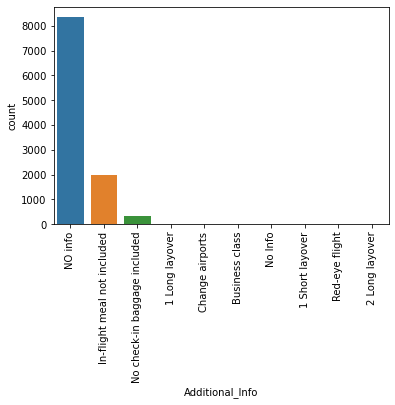

In [55]:
g=sns.countplot('Additional_Info',data=df)
g.set_xticklabels(labels=["NO info","In-flight meal not included","No check-in baggage included","1 Long layover","Change airports","Business class","No Info","1 Short layover","Red-eye flight","2 Long layover"],rotation=90)
plt.show()

In [56]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [57]:
df['Additional_Info'].replace(to_replace="No info",value=0,inplace=True)
df['Additional_Info'].replace(to_replace="No Info",value=0,inplace=True)
df['Additional_Info'].replace(to_replace="1 Long layover",value=11,inplace=True)
df['Additional_Info'].replace(to_replace="2 Long layover",value=22,inplace=True)
df['Additional_Info'].replace(to_replace="1 Short layover",value=2,inplace=True)
df['Additional_Info'].replace(to_replace="In-flight meal not included",value=1,inplace=True)
df['Additional_Info'].replace(to_replace="No check-in baggage included",value=3,inplace=True)
df['Additional_Info'].replace(to_replace="Change airports",value=4,inplace=True)
df['Additional_Info'].replace(to_replace="Business class",value=5,inplace=True)
df['Additional_Info'].replace(to_replace="Red-eye flight",value=6,inplace=True)

In [58]:
df['Additional_Info'].value_counts()

0     8347
1     1982
3      320
11      19
4        7
5        4
2        1
6        1
22       1
Name: Additional_Info, dtype: int64

In [59]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,1.0,24/03/2019,3,6,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,0,3897,24,3,2019,22,20,1,10,2,50
1,2.0,1/05/2019,2,7,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,0,7662,1,5,2019,5,50,13,15,7,25
2,0.0,9/06/2019,1,0,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,0,13882,9,6,2019,9,25,4,25,19,0
3,1.0,12/05/2019,2,7,CCU → NAG → BLR,18:05,23:30,5h 25m,1,0,6218,12,5,2019,18,5,23,30,5,25
4,1.0,01/03/2019,3,6,BLR → NAG → DEL,16:50,21:35,4h 45m,1,0,13302,1,3,2019,16,50,21,35,4,45


<AxesSubplot:xlabel='Airline', ylabel='Price'>

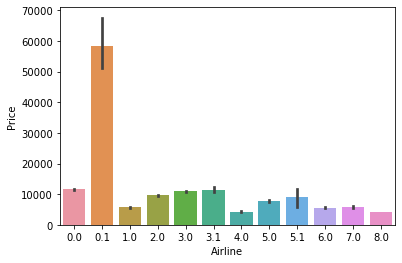

In [60]:
sns.barplot(x='Airline',y='Price',data=df)

<AxesSubplot:xlabel='Journey_Year', ylabel='Price'>

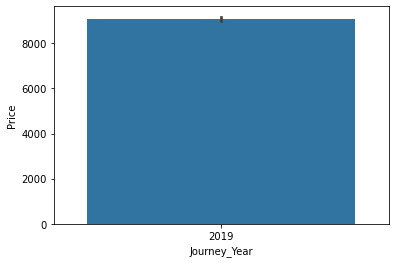

In [61]:
sns.barplot(x='Journey_Year',y='Price',data=df)

<AxesSubplot:xlabel='Jouney_Month', ylabel='Price'>

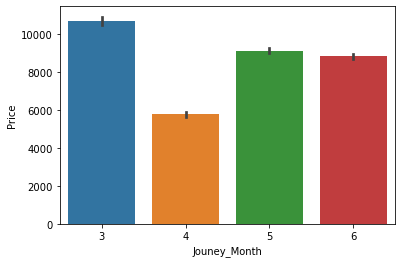

In [64]:
sns.barplot(x='Jouney_Month',y='Price',data=df)

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

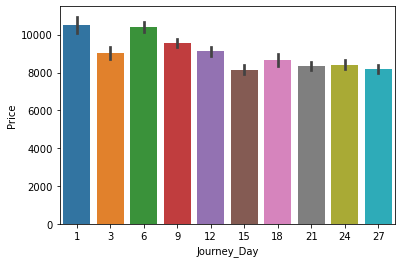

In [65]:
sns.barplot(x='Journey_Day',y='Price',data=df)

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

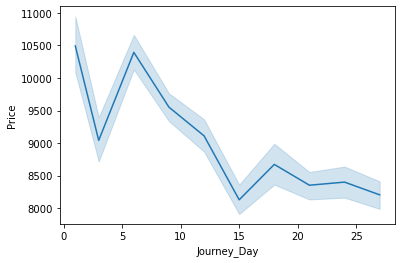

In [66]:
sns.lineplot(x='Journey_Day',y='Price',data=df)

<AxesSubplot:xlabel='Jouney_Month', ylabel='Price'>

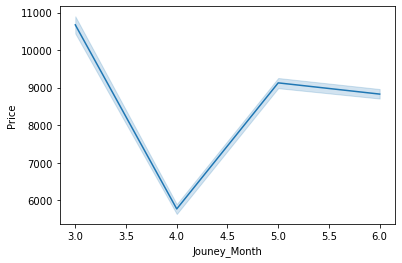

In [67]:
sns.lineplot(x='Jouney_Month',y='Price',data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

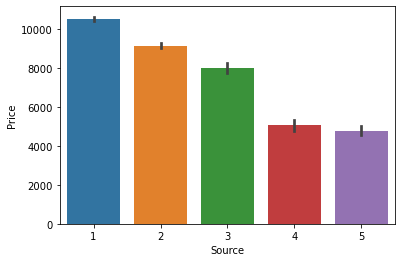

In [68]:
sns.barplot(x='Source',y='Price',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

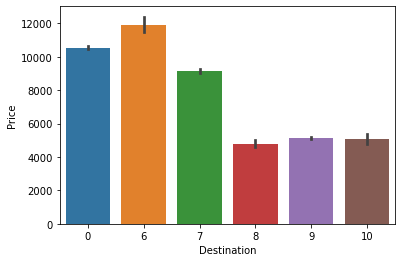

In [69]:
sns.barplot(x='Destination',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

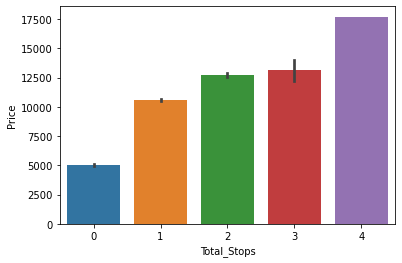

In [70]:
sns.barplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

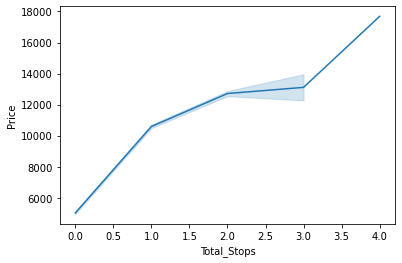

In [71]:
sns.lineplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

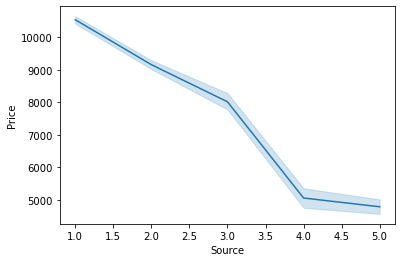

In [72]:
sns.lineplot(x='Source',y='Price',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

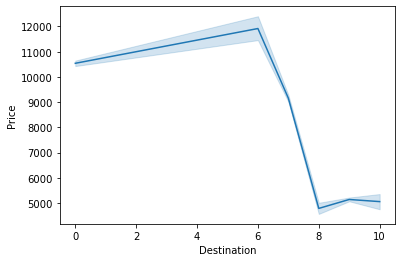

In [73]:
sns.lineplot(x='Destination',y='Price',data=df)

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

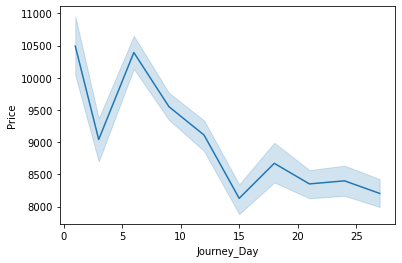

In [74]:
sns.lineplot(x='Journey_Day',y='Price',data=df)

In [75]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,1.0,24/03/2019,3,6,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,0,3897,24,3,2019,22,20,1,10,2,50
1,2.0,1/05/2019,2,7,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,0,7662,1,5,2019,5,50,13,15,7,25
2,0.0,9/06/2019,1,0,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,0,13882,9,6,2019,9,25,4,25,19,0
3,1.0,12/05/2019,2,7,CCU → NAG → BLR,18:05,23:30,5h 25m,1,0,6218,12,5,2019,18,5,23,30,5,25
4,1.0,01/03/2019,3,6,BLR → NAG → DEL,16:50,21:35,4h 45m,1,0,13302,1,3,2019,16,50,21,35,4,45


In [76]:
df.shape

(10682, 20)

In [77]:
X=df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Price'],axis=1)#independent feature
y=df['Price']#dependent feature

In [78]:
X.shape

(10682, 14)

In [79]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,1.0,3,6,0,0,24,3,2019,22,20,1,10,2,50
1,2.0,2,7,2,0,1,5,2019,5,50,13,15,7,25
2,0.0,1,0,2,0,9,6,2019,9,25,4,25,19,0
3,1.0,2,7,1,0,12,5,2019,18,5,23,30,5,25
4,1.0,3,6,1,0,1,3,2019,16,50,21,35,4,45


In [80]:
y.shape

(10682,)

In [81]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [90]:
X.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
Airline,1.000000,0.062718,0.046008,-0.206940,-0.066511,0.019638,-0.021891,NaN,-0.065297,0.058258,0.033377,0.085811,-0.246799,0.080862
Source,0.062718,1.000000,0.852622,-0.590943,0.093933,-0.066410,-0.167047,NaN,0.035173,0.117637,-0.028430,0.148661,-0.434206,0.095355
Destination,0.046008,0.852622,1.000000,-0.567374,0.084268,-0.085083,-0.082722,NaN,0.104335,0.078848,-0.006174,0.213962,-0.376044,0.158511
Total_Stops,-0.206940,-0.590943,-0.567374,1.000000,-0.060341,-0.009451,0.054383,NaN,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Additional_Info,-0.066511,0.093933,0.084268,-0.060341,1.000000,-0.007075,-0.000398,NaN,0.017329,0.062824,-0.064239,-0.018749,0.002070,-0.005193
Journey_Day,0.019638,-0.066410,-0.085083,-0.009451,-0.007075,1.000000,-0.038359,NaN,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Jouney_Month,-0.021891,-0.167047,-0.082722,0.054383,-0.000398,-0.038359,1.000000,NaN,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.065297,0.035173,0.104335,-0.061476,0.017329,0.002170,0.039127,NaN,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,0.058258,0.117637,0.078848,-0.002618,0.062824,-0.008170,-0.059267,NaN,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485


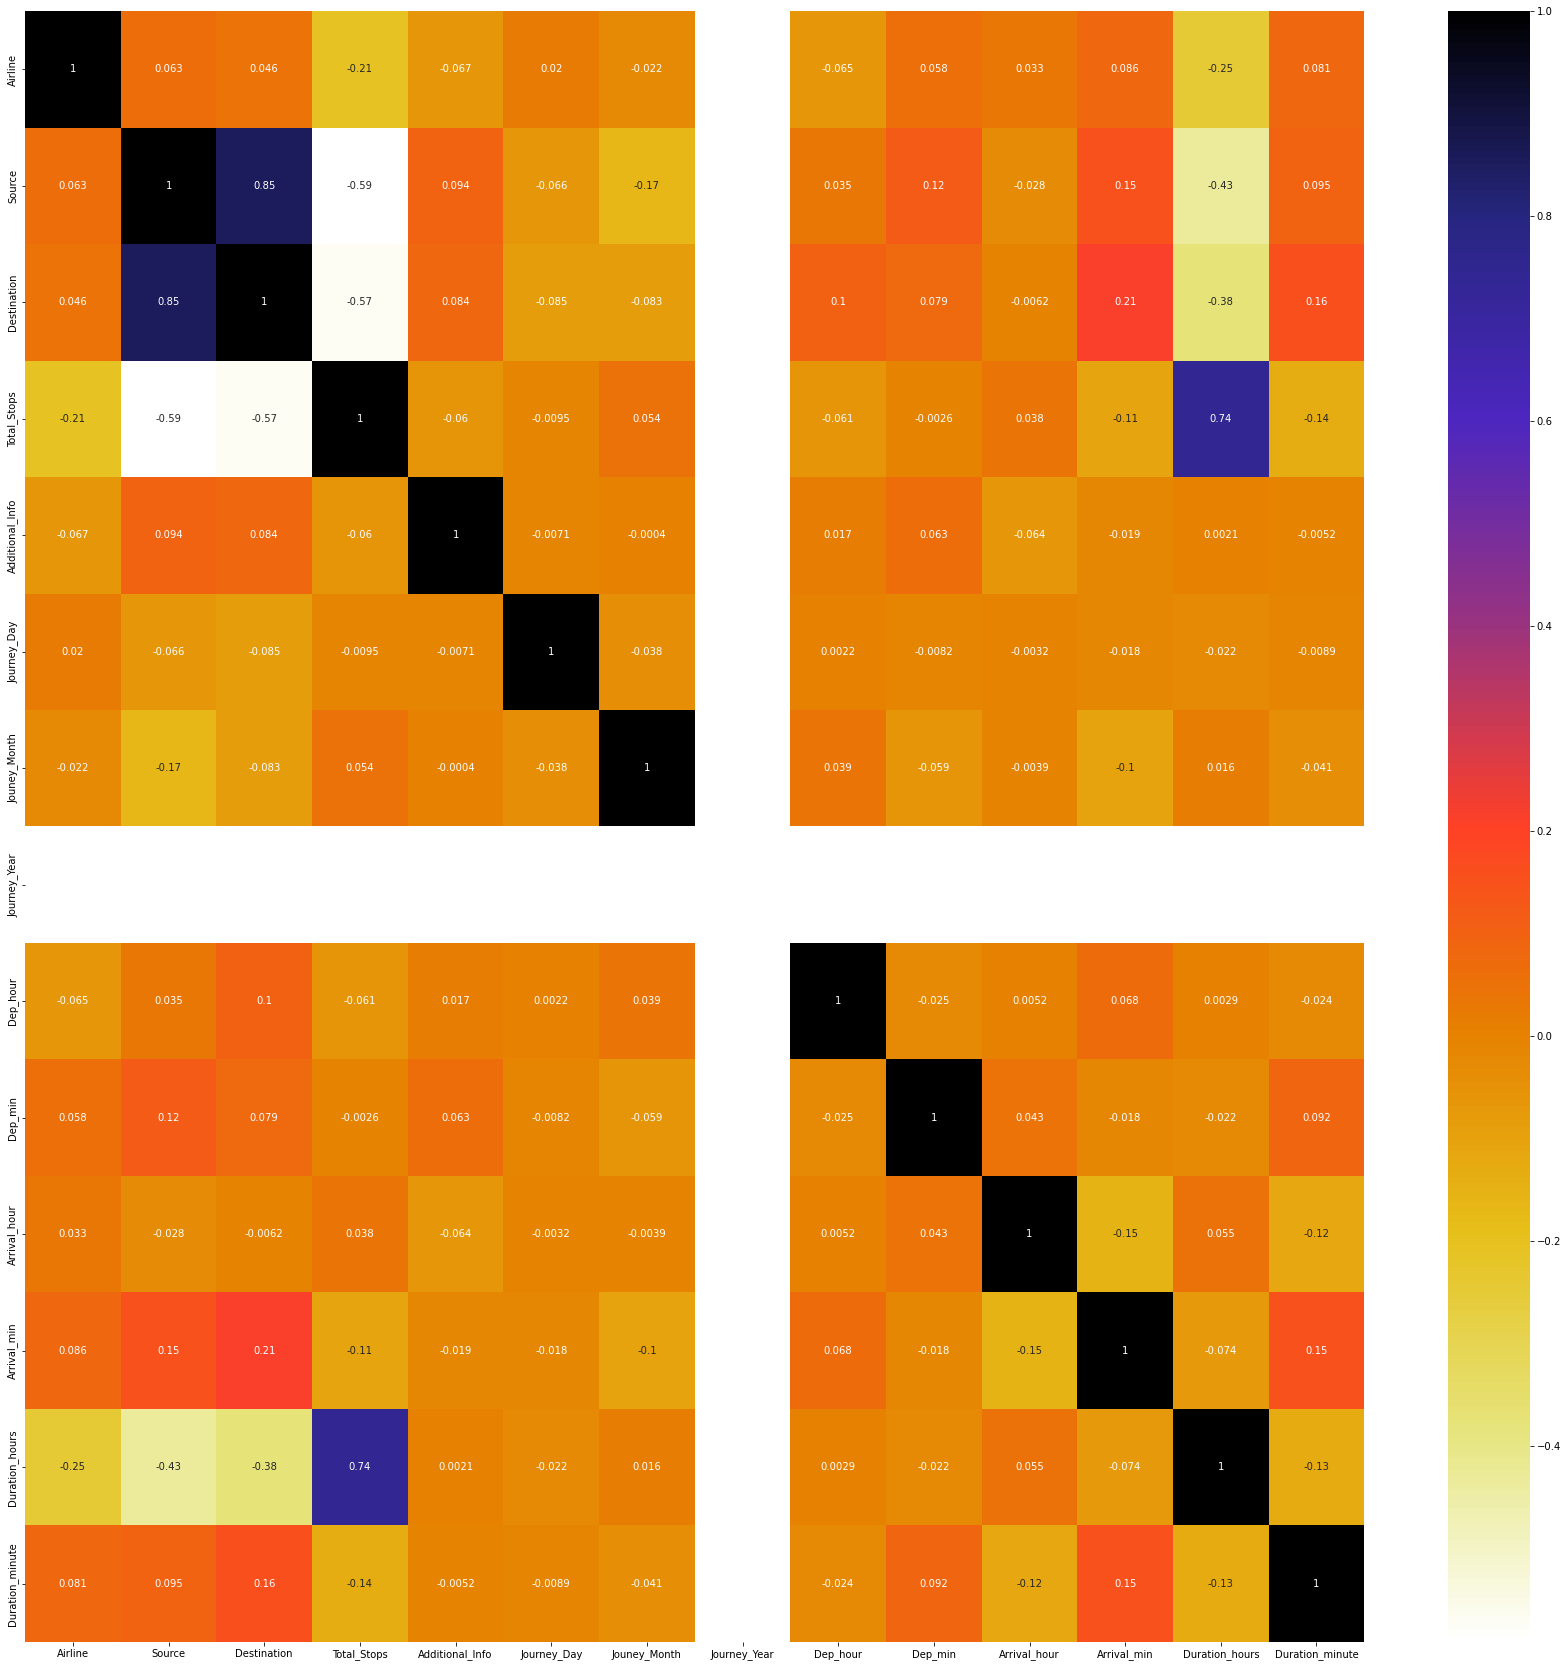

In [91]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [92]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

0

In [99]:
corr_features

set()

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#Training and Testing

In [83]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
749,0.0,4,10,0,0,27,6,2019,10,20,11,50,1,30
6077,4.0,2,7,0,0,21,6,2019,17,10,19,40,2,30
2373,3.0,1,0,1,0,27,5,2019,15,0,1,30,10,30
2442,6.0,2,7,1,0,9,5,2019,22,40,10,40,12,0
5402,2.0,1,0,2,0,9,6,2019,19,45,19,15,23,30


In [84]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
6075,3.0,1,0,2,0,21,5,2019,15,5,1,30,10,25
3544,7.0,1,0,1,0,3,6,2019,10,35,19,35,9,0
9291,5.0,2,7,1,0,9,5,2019,20,20,9,5,12,45
5032,1.0,5,8,0,0,24,5,2019,14,45,17,5,2,20
2483,0.0,1,0,1,1,21,5,2019,22,50,4,25,5,35


In [85]:
y_train.head()

749      8040
6077     3873
2373    13377
2442     5192
5402     9968
Name: Price, dtype: int64

In [86]:
y_test.head()

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
Name: Price, dtype: int64

In [87]:
X_train.shape

(7477, 14)

In [88]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [89]:
y_pred

array([16681.59,  5473.88,  8720.84, ...,  5877.01,  3537.66,  6979.91])

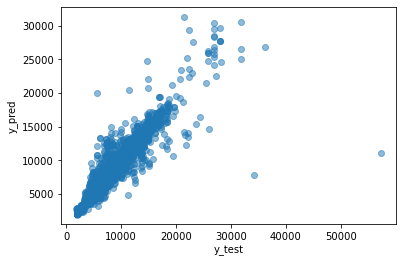

In [100]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [102]:
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MAE: 683.557421100463
RMSE: 1599.5903101208698


In [103]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Jouney_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
6075,3.0,1,0,2,0,21,5,2019,15,5,1,30,10,25
3544,7.0,1,0,1,0,3,6,2019,10,35,19,35,9,0
9291,5.0,2,7,1,0,9,5,2019,20,20,9,5,12,45
5032,1.0,5,8,0,0,24,5,2019,14,45,17,5,2,20
2483,0.0,1,0,1,1,21,5,2019,22,50,4,25,5,35


In [104]:
y_test.head()

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
Name: Price, dtype: int64

In [105]:
prediction=rfr.predict([[3.0,1,0,2,0,21,5,2019,15,5,1,30,10,25]])
print("Predicted price in rupees:",prediction)

Predicted price in rupees: [16681.59]


C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [108]:
prediction=rfr.predict([[7.0,1,0,1,0,3,6,2019,10,35,19,35,9,0]])
print("Predicted price in rupees:",prediction,"rupees")

Predicted price in rupees: [5473.88] rupees


C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [109]:
import pickle
pickle.dump(rfr,open('Flight_Price_Prediction_Model.pkl','wb'))